In [1]:
#https://www.kaggle.com/peeyushsahu/classification-of-leaf

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import sklearn.preprocessing as preprocessing
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from scipy.stats import skew 


import os
#print(os.listdir("../input"))

train = pd.read_csv("train_leaf.csv")
test = pd.read_csv("test_leaf.csv")
print(train.shape, test.shape)
print(test.head())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(990, 194) (594, 193)
   id   margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
0   4  0.019531  0.009766  0.078125  0.011719  0.003906  0.015625  0.005859   
1   7  0.007812  0.005859  0.064453  0.009766  0.003906  0.013672  0.007812   
2   9  0.000000  0.000000  0.001953  0.021484  0.041016  0.000000  0.023438   
3  12  0.000000  0.000000  0.009766  0.011719  0.017578  0.000000  0.003906   
4  13  0.001953  0.000000  0.015625  0.009766  0.039062  0.000000  0.009766   

   margin8   margin9    ...      texture55  texture56  texture57  texture58  \
0      0.0  0.005859    ...       0.006836   0.000000   0.015625   0.000977   
1      0.0  0.033203    ...       0.000000   0.000000   0.006836   0.001953   
2      0.0  0.011719    ...       0.128910   0.000000   0.000977   0.000000   
3      0.0  0.003906    ...       0.012695   0.015625   0.002930   0.036133   
4      0.0  0.005859    ...       0.000000   0.042969   0.016602   0.010742   

   texture59  texture60  tex

In [3]:
#Null value estimation


# Check for null values in training and test set
print('Null values in Training set:', train.isnull().sum().sum(), ', Total values in Training set:', train.isnull().count().sum())
print('Null values in Test set:', test.isnull().sum().sum(), ', Total values in Test set:', test.isnull().count().sum())

Null values in Training set: 0 , Total values in Training set: 192060
Null values in Test set: 0 , Total values in Test set: 114642


Skewness in data
margin16     10.889101
texture15     7.975779
texture60     6.256586
texture56     6.072296
texture61     6.067938
margin52      5.592275
margin23      5.421293
texture36     5.028422
margin64      4.768789
texture37     4.742752
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000004D9354EFD0>,
      dtype=object)

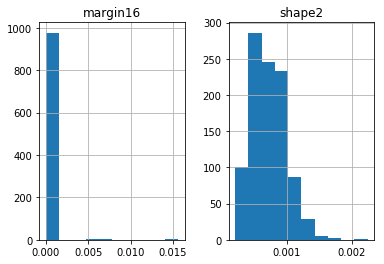

In [4]:
#Checking for feature skewness

# Some data vizualization for accessing scaling, standardization and normalization need
skewness = train.iloc[:,2:].apply(lambda x: skew(x.dropna()))
print('Skewness in data')
print(skewness.sort_values(ascending=False)[:10])
train[['margin16', 'shape2']].hist()

In [5]:
#Prepare training and test dataset for ML

# Lets prepare training and test set for ML models
le = preprocessing.LabelEncoder().fit(train.species)
labels = le.transform(train.species)
classes = le.classes_

test_id = test.id
train_df = train.drop(['id', 'species'], axis=1)
test_df = test.drop(['id'], axis=1)
print(train_df.head(2))
#print(le.classes_)
#print(train.species[:10], labels[:10])

    margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
0  0.007812  0.023438  0.023438  0.003906  0.011719  0.009766  0.027344   
1  0.005859  0.000000  0.031250  0.015625  0.025391  0.001953  0.019531   

   margin8   margin9  margin10    ...      texture55  texture56  texture57  \
0      0.0  0.001953  0.033203    ...       0.007812        0.0    0.00293   
1      0.0  0.000000  0.007812    ...       0.000977        0.0    0.00000   

   texture58  texture59  texture60  texture61  texture62  texture63  texture64  
0   0.002930   0.035156        0.0        0.0   0.004883   0.000000   0.025391  
1   0.000977   0.023438        0.0        0.0   0.000977   0.039062   0.022461  

[2 rows x 192 columns]


StandardScaler(copy=True, with_mean=True, with_std=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000004D93787128>,
      dtype=object)

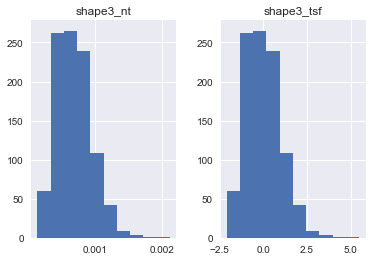

In [6]:
#Scaling of features

# We want to scale the data for better performance on ML, we will use standardscaler

scaler = preprocessing.StandardScaler().fit(train_df)
print(scaler)

train_df = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns)
test_df = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)

# Visualize standardscaler transformation
sns.set()
scaler = preprocessing.StandardScaler().fit(train[['shape2', 'shape3', 'shape1', 'margin16']])
scaled_train = scaler.transform(train[['shape2', 'shape3', 'shape1', 'margin16']]) 
df_dist = pd.DataFrame({'shape3_nt': train['shape3'], 'shape3_tsf': scaled_train[:,1]})
#print(df_dist.head())
df_dist.hist()

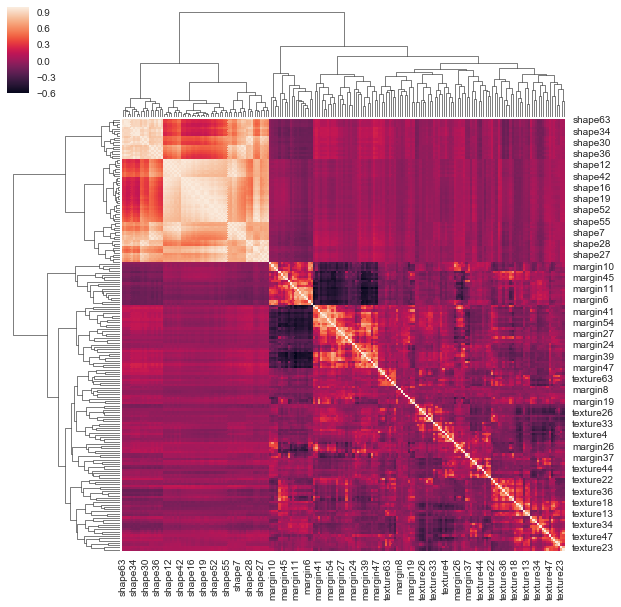

In [7]:
#Checking correlation between features

feature_corr = train_df.corr(method='pearson')
sns.set()
sns.clustermap(feature_corr)

In [8]:
# We will keep 30% data for test and rest for training
sss = StratifiedShuffleSplit(y=labels, test_size=0.2, random_state=0, n_iter=1)

for train_ind, test_ind in sss:
    print(len(train_ind), len(test_ind))
    print(test_ind[:5])
    x_train, x_test = train_df.iloc[train_ind,], train_df.iloc[test_ind,]
    y_train, y_test = labels[train_ind], labels[test_ind]
print(x_test.head(2), y_test[:2])

792 198
[369 759 978 830 771]
      margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
369  0.206378 -0.030778  0.273834  0.211903  0.286572 -0.328734  0.576805   
759  0.305420 -0.131357  0.651866  0.418228 -0.351007 -0.178493  0.018812   

      margin8   margin9  margin10    ...      texture55  texture56  texture57  \
369 -0.395064  0.728566  1.393026    ...      -0.575984  -0.260149  -0.518808   
759 -0.395064 -0.802765  1.757772    ...      -0.545165  -0.260149   3.016670   

     texture58  texture59  texture60  texture61  texture62  texture63  \
369  -0.345848   3.727651  -0.233151   -0.23561  -0.419910   1.473253   
759  -0.462921   0.159630  -0.233151   -0.23561  -0.520012  -0.652143   

     texture64  
369  -0.595919  
759   1.592717  

[2 rows x 192 columns] [43 90]


In [9]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
# Grid search for parameter estimation
def gridSearch(model, parameters, scoring='accuracy'):
    clf = GridSearchCV(model, parameters, scoring)
    return clf

In [11]:
#SVM

# Let us start by SVM
parameters = {'kernel': ('linear', 'rbf'), 'C': [0.01, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1, 10]}
svc = SVC(probability=True, cache_size=1000)
clf = gridSearch(svc, parameters)
print(clf)
clf.fit(x_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.01, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)
{'C': 0.05, 'kernel': 'linear'}
0.9835858585858586


In [12]:
train_predictions = clf.predict(x_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

Accuracy: 99.4949%


In [14]:
#Random forest

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=0)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [15]:
rf_train_prediction = rf_clf.predict(x_test)
rf_acc = accuracy_score(y_test, rf_train_prediction)
print("Accuracy: {:.4%}".format(rf_acc))

rf_train_prediction = rf_clf.predict_proba(x_test)
rf_ll = log_loss(y_test, rf_train_prediction)
print("Log Loss: {}".format(rf_ll))

Accuracy: 98.4848%
Log Loss: 0.7597930652940593


In [16]:
#Predicting actual test set

# Predicting the actual set
nu_test_predict = rf_clf.predict(test_df)
test_predict = clf.predict(test_df)
acc = accuracy_score(test_predict, nu_test_predict)
print("Aggrement between two SVM linear and rbf models on prediction: {:.4%}".format(acc))

Aggrement between two SVM linear and rbf models on prediction: 97.9798%


In [17]:
# Predicting probability of class for the actual test set
test_predict_prob = rf_clf.predict_proba(test_df)

In [18]:
# Format DataFrame
submission = pd.DataFrame(test_predict_prob, columns=classes)
submission.insert(0, 'id', test_id)
submission.reset_index()
print(submission.head())
submission.to_csv('prc_rf_submission.csv', index=False)

   id  Acer_Capillipes  Acer_Circinatum  Acer_Mono  Acer_Opalus  \
0   4            0.000            0.001      0.000        0.000   
1   7            0.003            0.000      0.026        0.030   
2   9            0.002            0.582      0.004        0.001   
3  12            0.006            0.020      0.002        0.023   
4  13            0.017            0.018      0.000        0.000   

   Acer_Palmatum  Acer_Pictum  Acer_Platanoids  Acer_Rubrum  Acer_Rufinerve  \
0          0.000        0.004            0.000        0.000           0.000   
1          0.002        0.009            0.055        0.006           0.000   
2          0.059        0.005            0.001        0.004           0.022   
3          0.001        0.000            0.004        0.004           0.022   
4          0.001        0.000            0.002        0.004           0.135   

        ...         Salix_Fragilis  Salix_Intergra  Sorbus_Aria  \
0       ...                  0.000           0.000     